In [1]:
from awg import *
from awg.core import *
import matplotlib.pyplot as plt
import numpy as np

## The purpose of this tutorial is to feature more advanced applications of the model.

In [2]:

model = AWG(clad = SiO2, core = Si, subs = SiO2, lambda_c = 1.550,
            Ni = 1, No = 9, w = 0.450, h = 0.220, N = 40, m = 75, R = 130,
            d = 2.5, g = 0.4, do = 1.8, wi = 1.5, wo = 1.5, L0 = 20)

options = SimulationOptions()
options.PhaseErrorVariance = 0.12
options.ModeType = "gaussian"
options.PropagationLoss = 1
options.InsertionLoss = 0.5

In [3]:
iteration = 10
data = np.zeros((iteration,7))
for n in range(iteration):
    results = Spectrum(model,1.55,0.01,Options = options,Samples = 100)
    measurements = Analyse(results)
    
    data[n,:] = measurements.Value
    

1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100
1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46

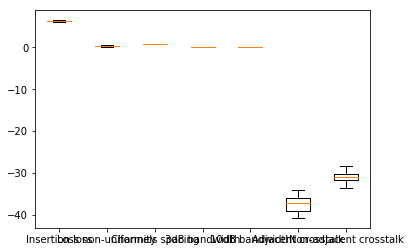

In [4]:
fig,ax = plt.subplots()
ax.boxplot(data,labels = ["Insertion loss","Loss non-uniformity","Channels spacing", "3dB bandwidth","10dB bandwidth", "Adjacent crosstalk","Non-adjacent crosstalk"],showfliers = False)
plt.show()
plt.rcParams["figure.figsize"]=25,20
plt.rcParams.update({'font.size': 15})

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


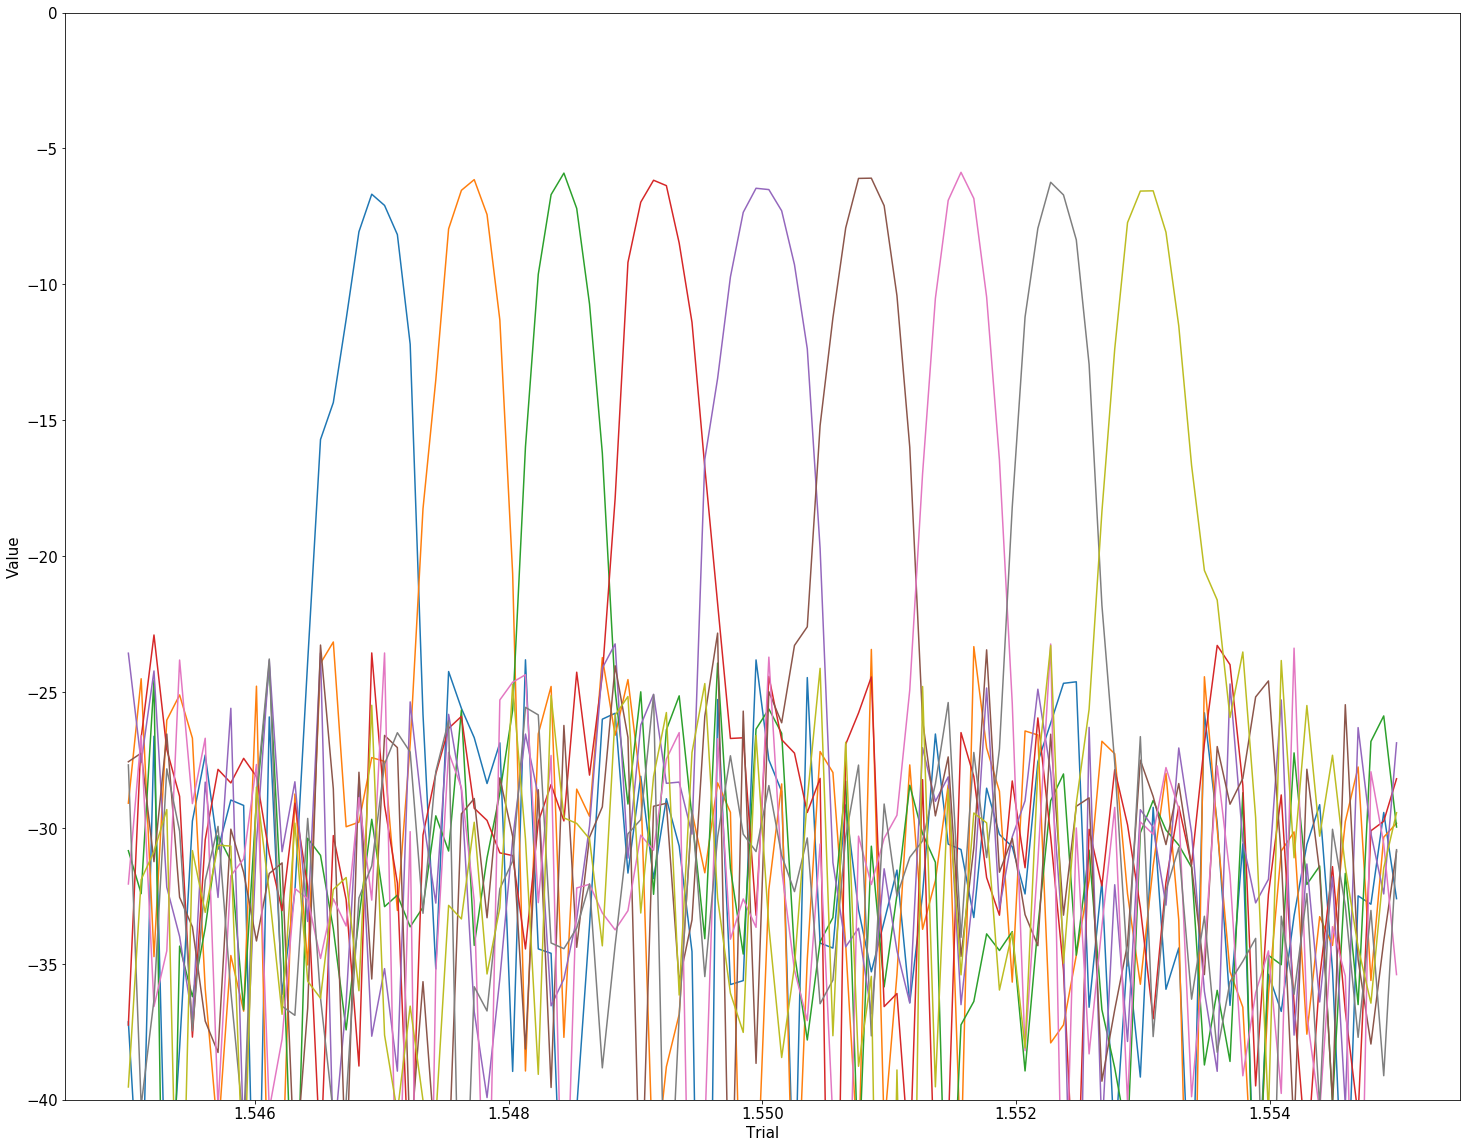

In [5]:
plt.plot(results.wavelength, 10*np.log10(results.transmission))
plt.ylim(-40,0)
plt.xlabel('Trial')
plt.ylabel("Value")
plt.show()

In [ ]:
# increase AWG output waveguide width
temp = model;
temp.wo = 3.0
temp.do = 3.2

# simulate
options = SimulationOptions()
options.ModeType = 'solve'

results = Spectrum(temp, 1.55, 0.01, Options = options, Samples = 100)

In [ ]:
plt.plot(results.wavelength, 10*np.log10(results.transmission))
plt.ylim(-40,0)
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel("Average Transmission (dB)")
plt.show()

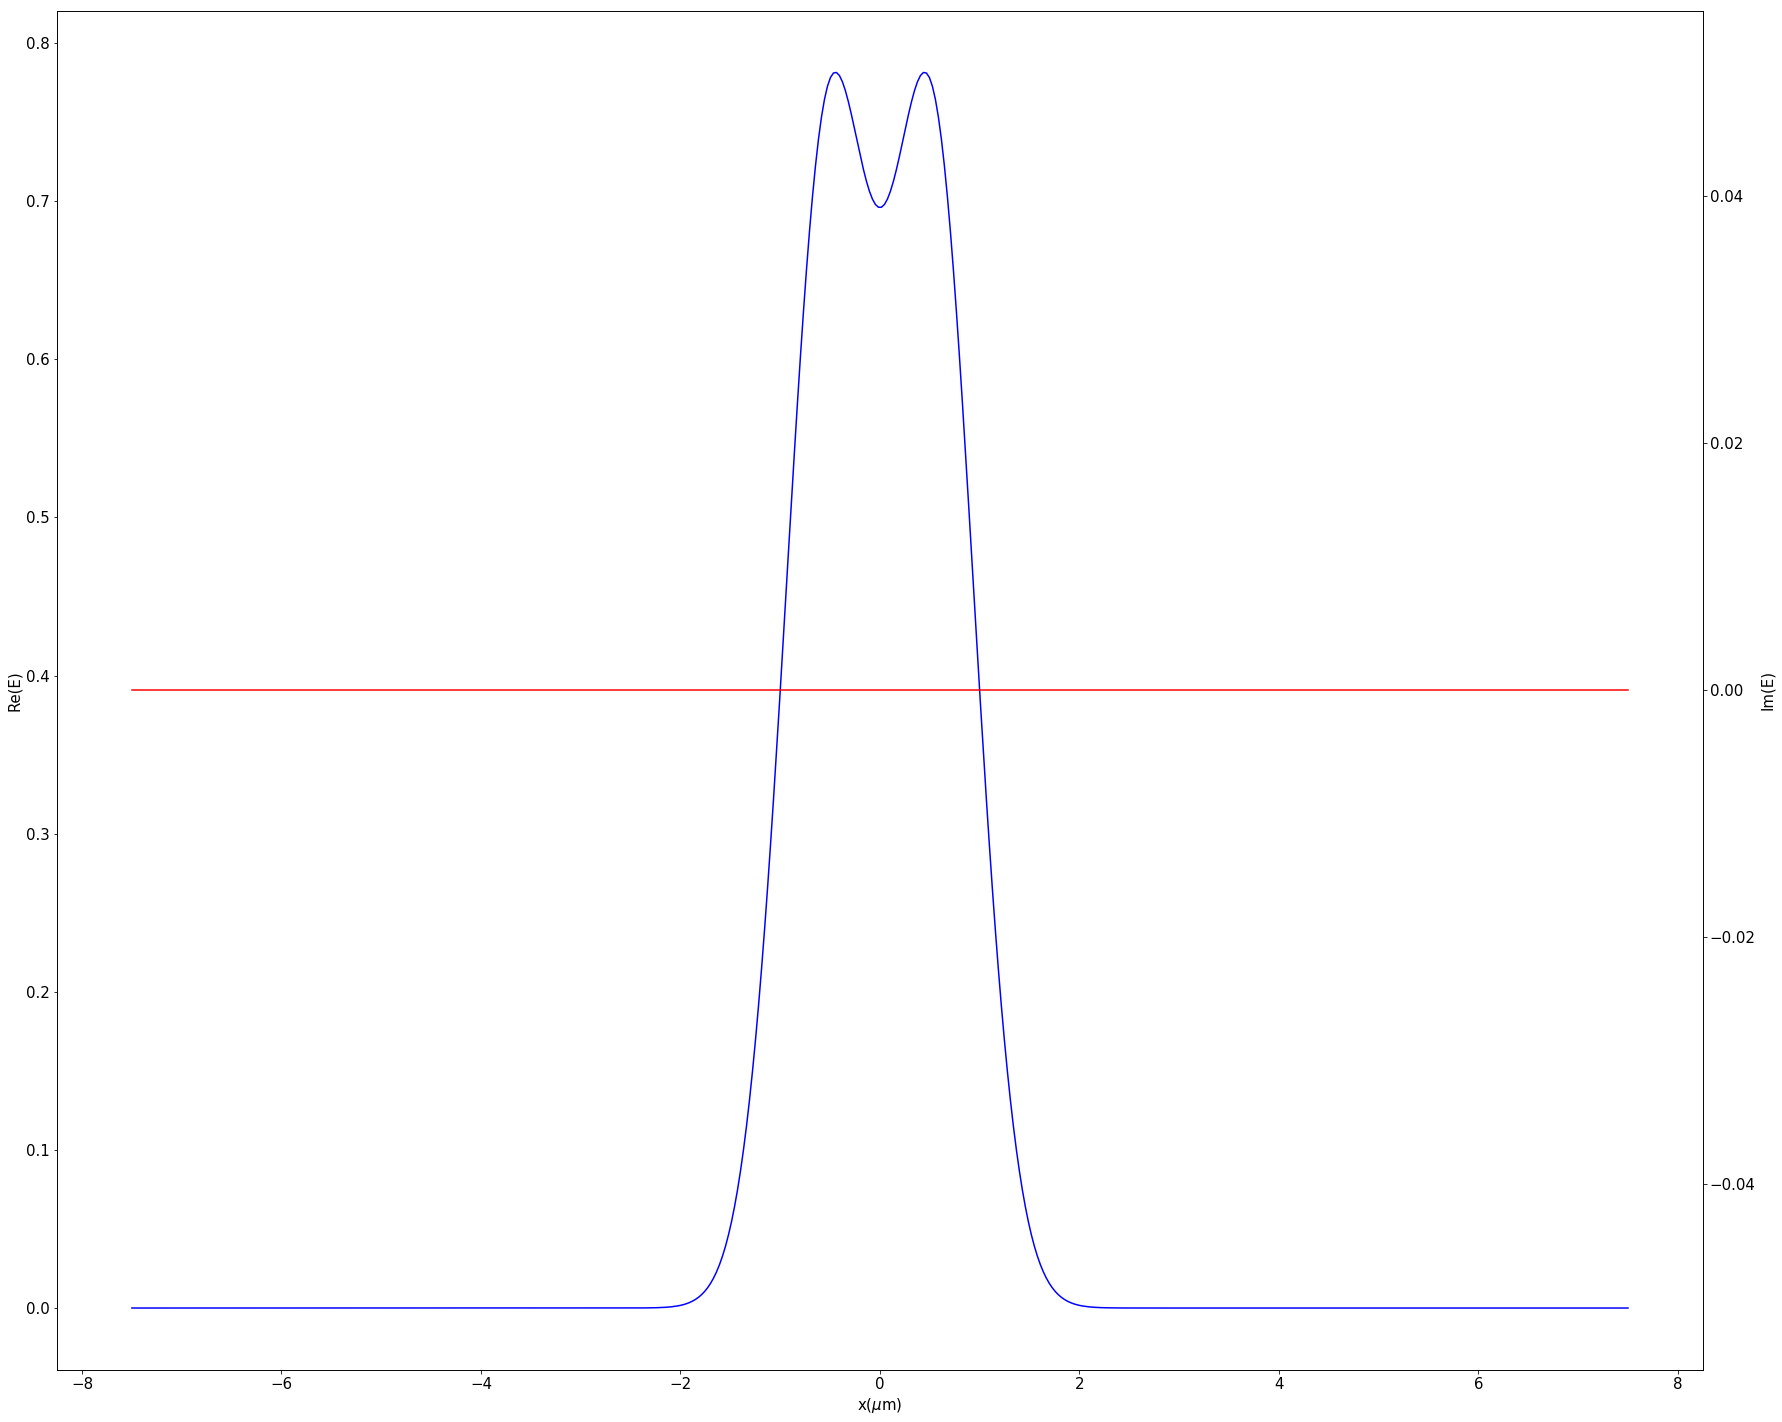

In [15]:
x= np.linspace(-model.wi*5,model.wi*5,500)
a = 0.6
b = a-0.08
u = np.exp(-((x-b)/a)**2)+np.exp(-((x+b)/a)**2)
F = Field(x,u).normalize()

plotfield(F)
options.CustomInputField = F

In [16]:
results = Spectrum(model,1.55,0.01,Options = options, Samples = 100)

TypeError: object of type 'Field' has no len()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


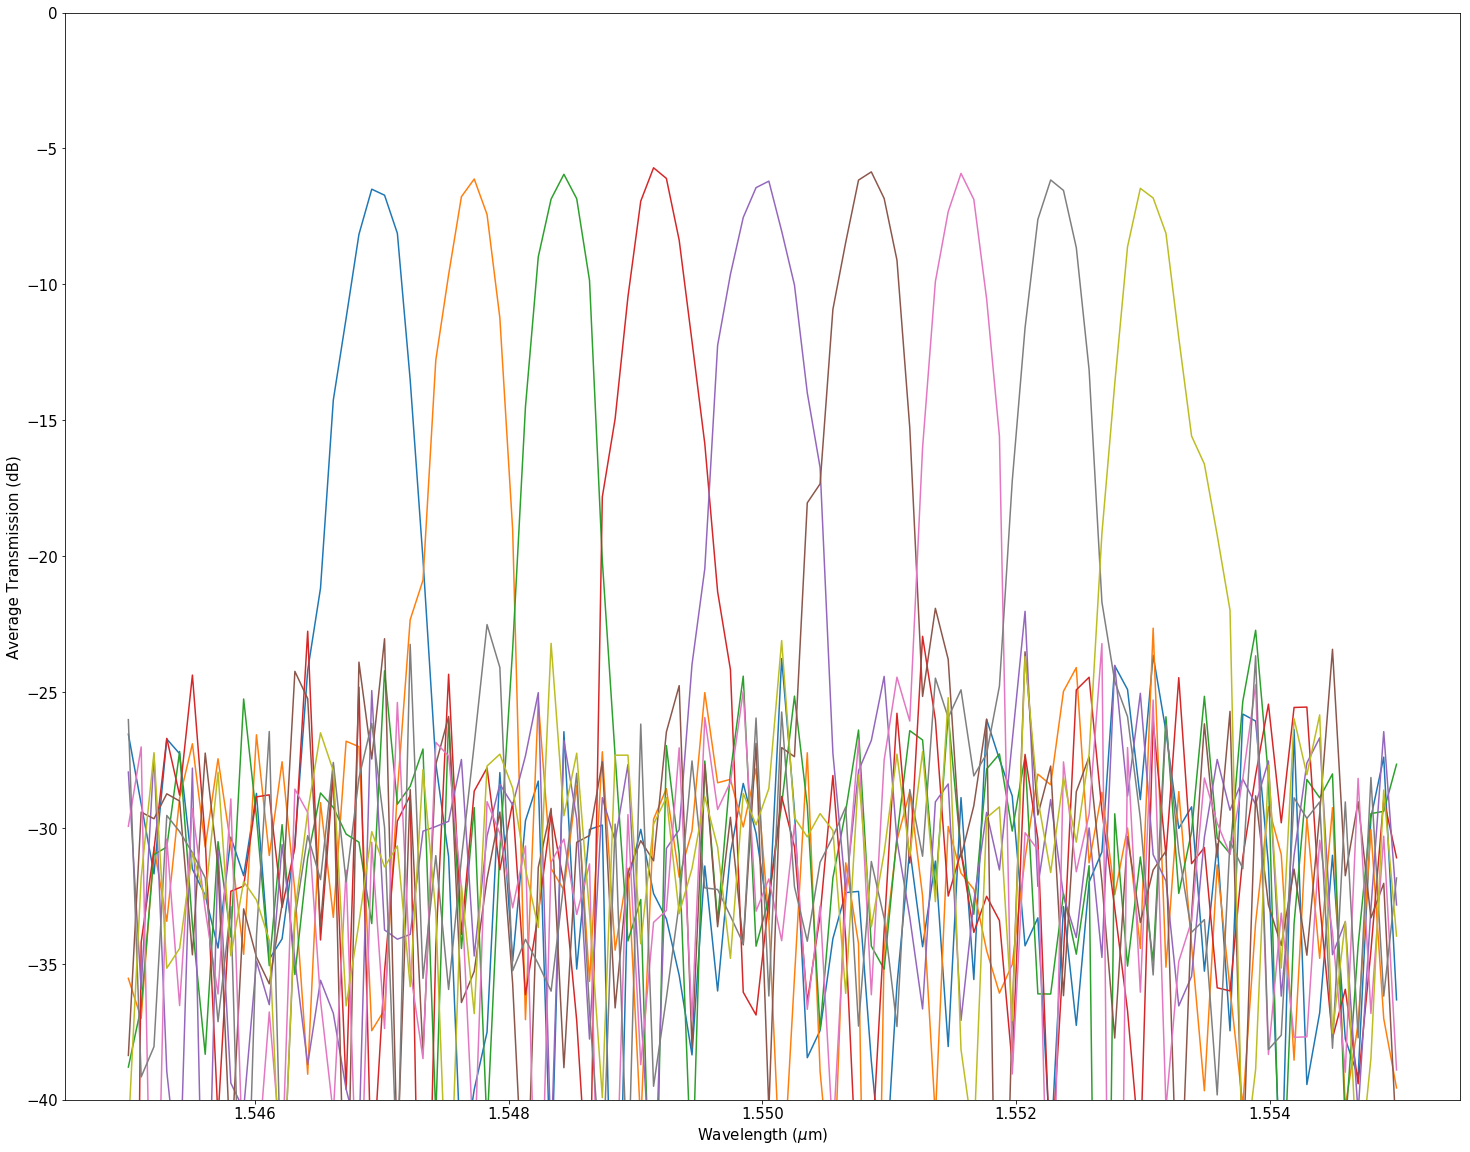

In [13]:
plt.plot(results.wavelength,10*np.log10(results.transmission))
plt.ylim(-40,0)
plt.xlabel("Wavelength ($\mu$m)")
plt.ylabel("Average Transmission (dB)")
plt.show()